In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

import helpers, metrics, image_handler
from compression_techniques import (
    classical_compression,
    ml_compression,
    dl_compression
)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Define paths
train_path = "../Dataset/flicker8k/train/"
test_path = "../Dataset/flicker8k/test/"

test_images_paths = helpers.pick_random_images_from_path(test_path)

In [3]:
test_images_gray_path = "../Dataset/flicker8k/test_images_gray/"
dct_images_gray_path = "../Dataset/flicker8k/dct_images_gray/"
wavelet_images_gray_path = "../Dataset/flicker8k/wavelet_images_gray/"
svd_images_gray_path = "../Dataset/flicker8k/svd_images_gray/"

In [4]:
%reload_ext autoreload

test_image_handler = image_handler.ImageHandling(image_paths=test_images_paths)
test_image_handler.open_images_to_list()
test_images = test_image_handler.images

In [5]:
test_images_rgb = helpers.convert_images_to_arrays(test_images)
test_images_gray = helpers.convert_to_grayscale(test_images)
test_images_gray = helpers.convert_images_to_arrays(test_images_gray)

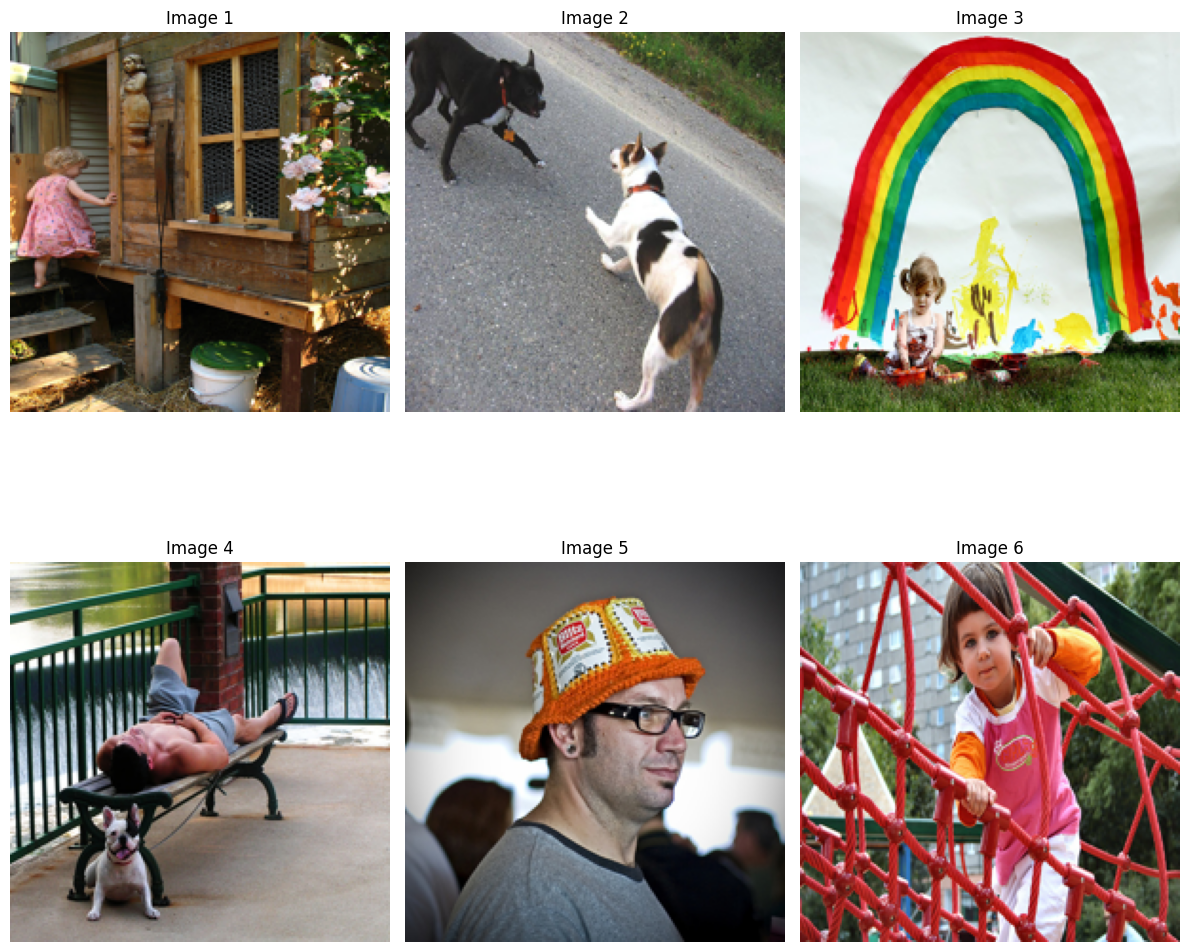

In [19]:
%reload_ext autoreload

helpers.preview_images(test_images_rgb, 6)

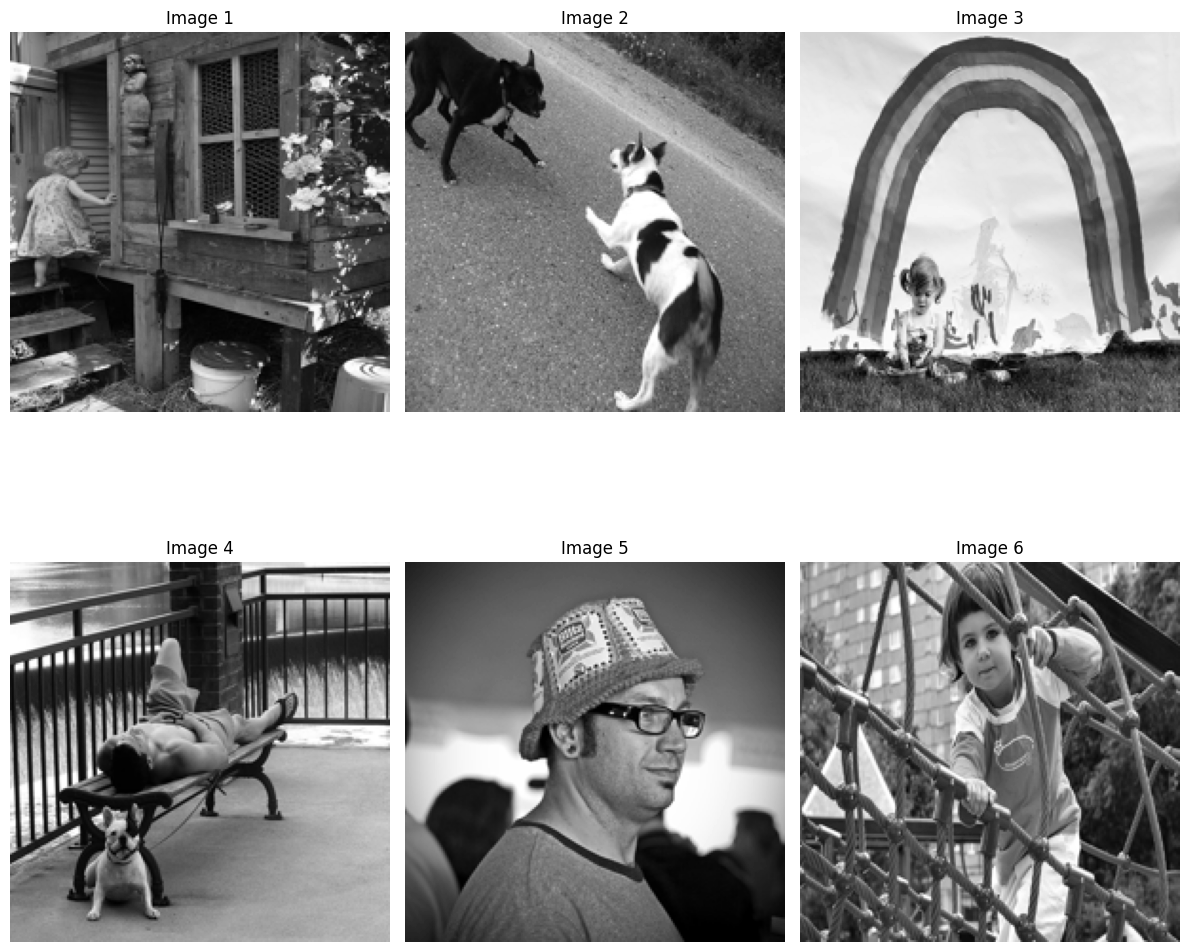

In [17]:
%reload_ext autoreload

helpers.preview_images(test_images_gray, 6)

# For Classical Techniques

In [21]:
%reload_ext autoreload

c_compression = classical_compression.ClassicalCompression(image_handler=test_image_handler)
dct_images = c_compression.dct_compression()
wavelet_compressed_images = c_compression.wavelet_compression()
svd_compressed_images = c_compression.svd_compression(k=40)

In [22]:
print(len(dct_images), len(wavelet_compressed_images), len(svd_compressed_images))

1000 1000 1000


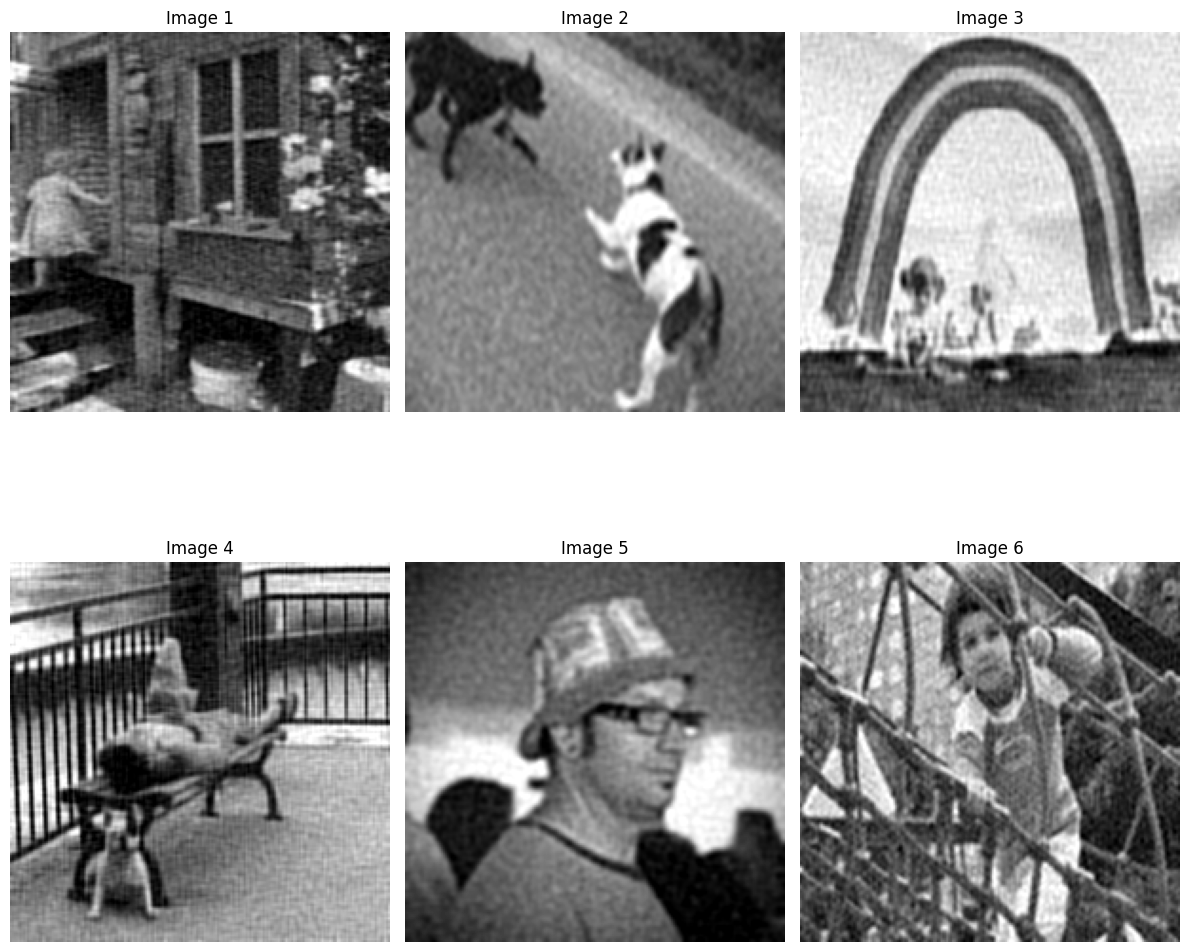

In [23]:
%reload_ext autoreload

helpers.preview_images(dct_images, 6)

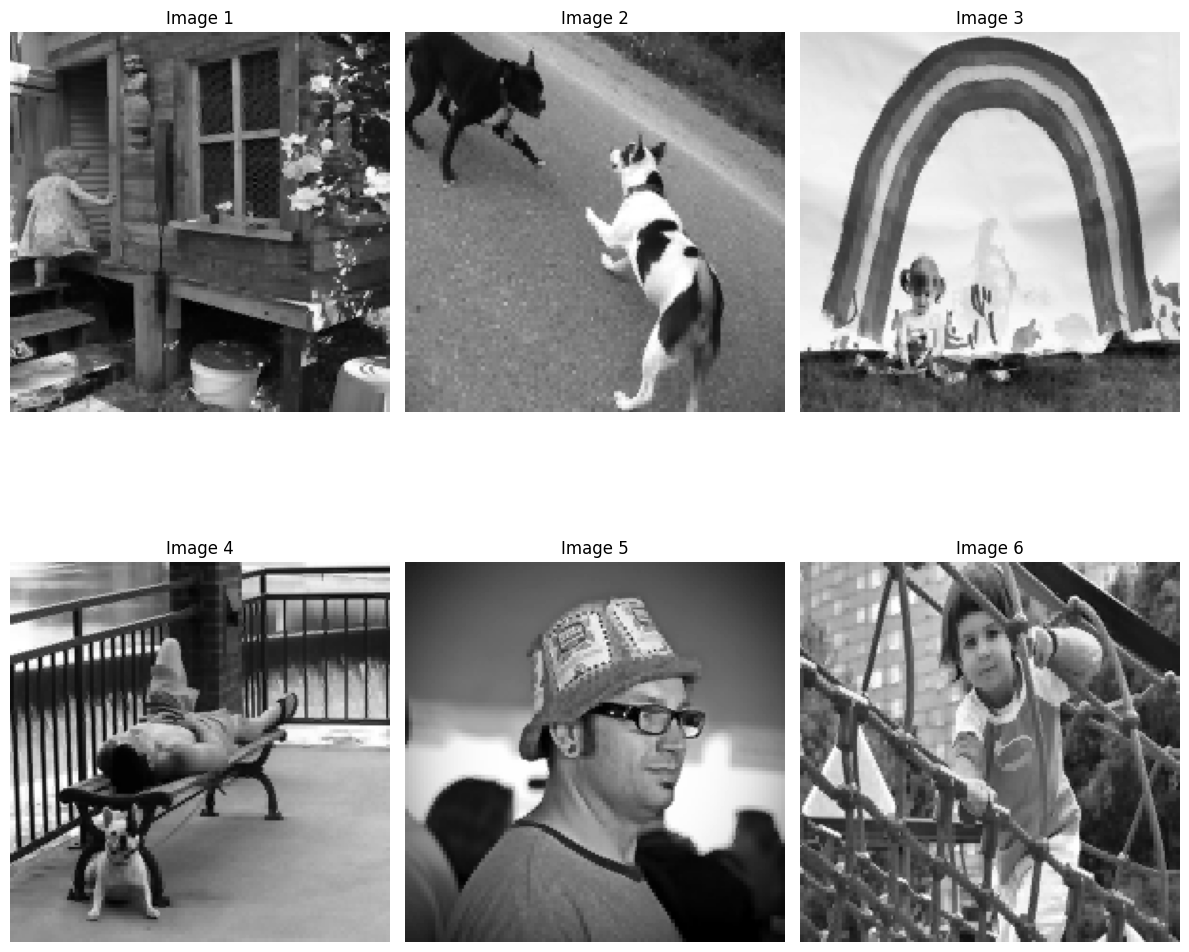

In [24]:
%reload_ext autoreload

helpers.preview_images(wavelet_compressed_images, 6)

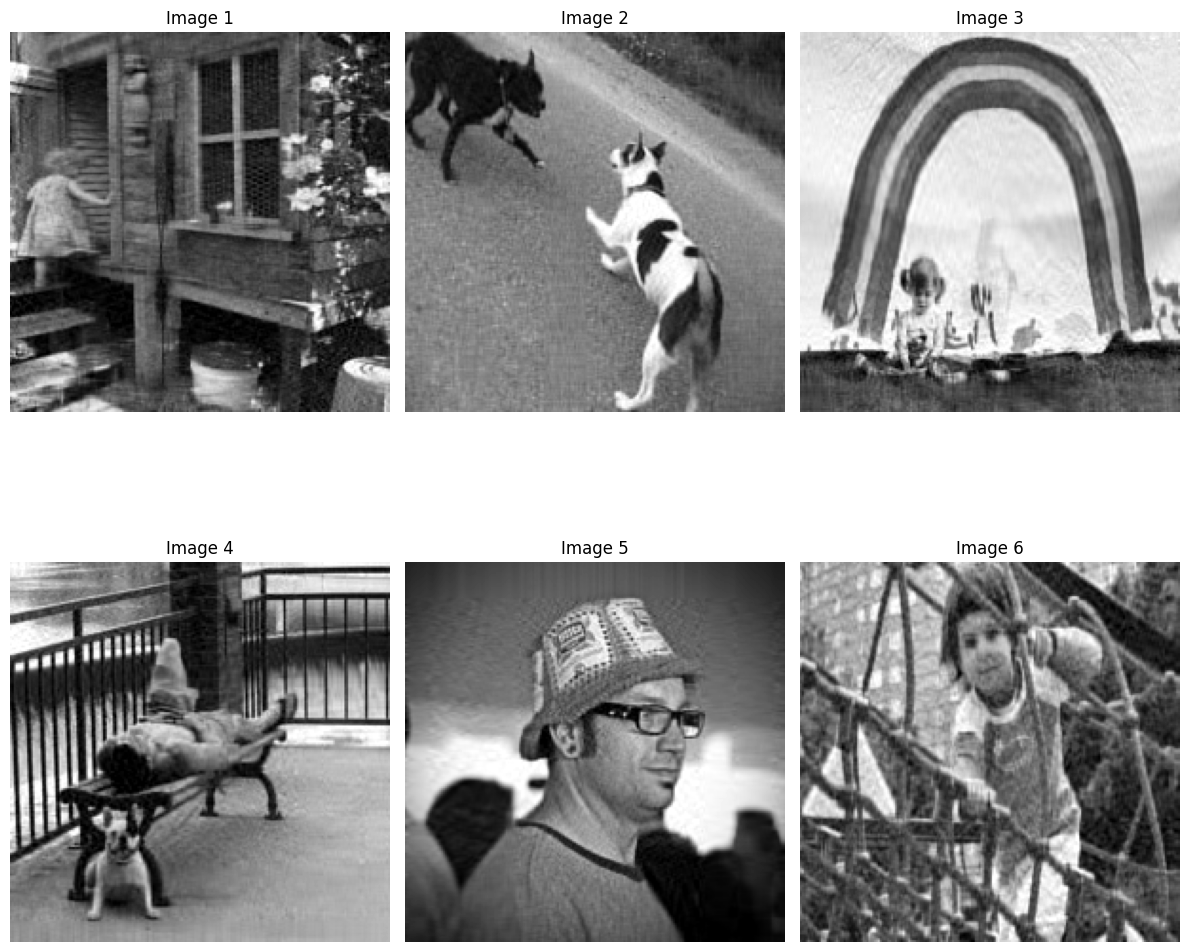

In [25]:
%reload_ext autoreload

helpers.preview_images(svd_compressed_images, 6)

In [29]:
dct_metrics = metrics.Metrics(original_images=test_images_gray, compressed_images=dct_images)
dct_all_metrics = dct_metrics.metrics_flow()
dct_all_metrics

{'Mean PSNR': 30.434, 'Mean SSIM': 0.721}

In [30]:
wavelet_metrics = metrics.Metrics(original_images=test_images_gray, compressed_images=wavelet_compressed_images)
wavelet_all_metrics = wavelet_metrics.metrics_flow()
wavelet_all_metrics

{'Mean PSNR': 32.682, 'Mean SSIM': 0.882}

In [31]:
svd_metrics = metrics.Metrics(original_images=test_images_gray, compressed_images=svd_compressed_images)
svd_all_metrics = svd_metrics.metrics_flow()
svd_all_metrics

{'Mean PSNR': 32.918, 'Mean SSIM': 0.881}

In [37]:
for images, path in zip([test_images_gray, dct_images, wavelet_compressed_images, svd_compressed_images], [test_images_gray_path, dct_images_gray_path, wavelet_images_gray_path, svd_images_gray_path]):
    helpers.save_images(images, path)

Images saved to ../Dataset/flicker8k/test_images_gray/
Images saved to ../Dataset/flicker8k/dct_images_gray/
Images saved to ../Dataset/flicker8k/wavelet_images_gray/
Images saved to ../Dataset/flicker8k/svd_images_gray/


In [ ]:
import os

original_size = helpers.get_path_size(test_images_gray_path)
for name, path in zip(["dct", "wavelet", "svd"], [dct_images_gray_path, wavelet_images_gray_path, svd_images_gray_path]):
    compressed_size = helpers.get_path_size(path)
    print(f"Original Size: {original_size}, {name}: {compressed_size}")
    savings = (original_size - compressed_size) / original_size * 100
    print(f"Storage Savings: {savings:.2f}%")

Original Size: 8298933, dct: 6782679
Storage Savings: 18.27%
Original Size: 8298933, wavelet: 7418122
Storage Savings: 10.61%
Original Size: 8298933, svd: 7683614
Storage Savings: 7.41%


In [41]:
original_size

262144

# For ML Techniques

In [48]:
%reload_ext autoreload

ml_train_images_paths = helpers.pick_random_images_from_path(train_path, 2000)
train_image_handler = image_handler.ImageHandling(image_paths=ml_train_images_paths)
train_image_handler.open_images_to_list()
train_images = train_image_handler.images

In [49]:
train_images_rgb = helpers.convert_images_to_arrays(train_images)
train_images_gray = helpers.convert_to_grayscale(train_images)
train_images_gray = helpers.convert_images_to_arrays(train_images_gray)

In [50]:
compression = ml_compression.MLCompression(train_image_handler, test_image_handler)

In [52]:
%reload_ext autoreload

compression.train_pca(k=30)
compressed_images_pca = compression.compress_images(compression_type="pca")

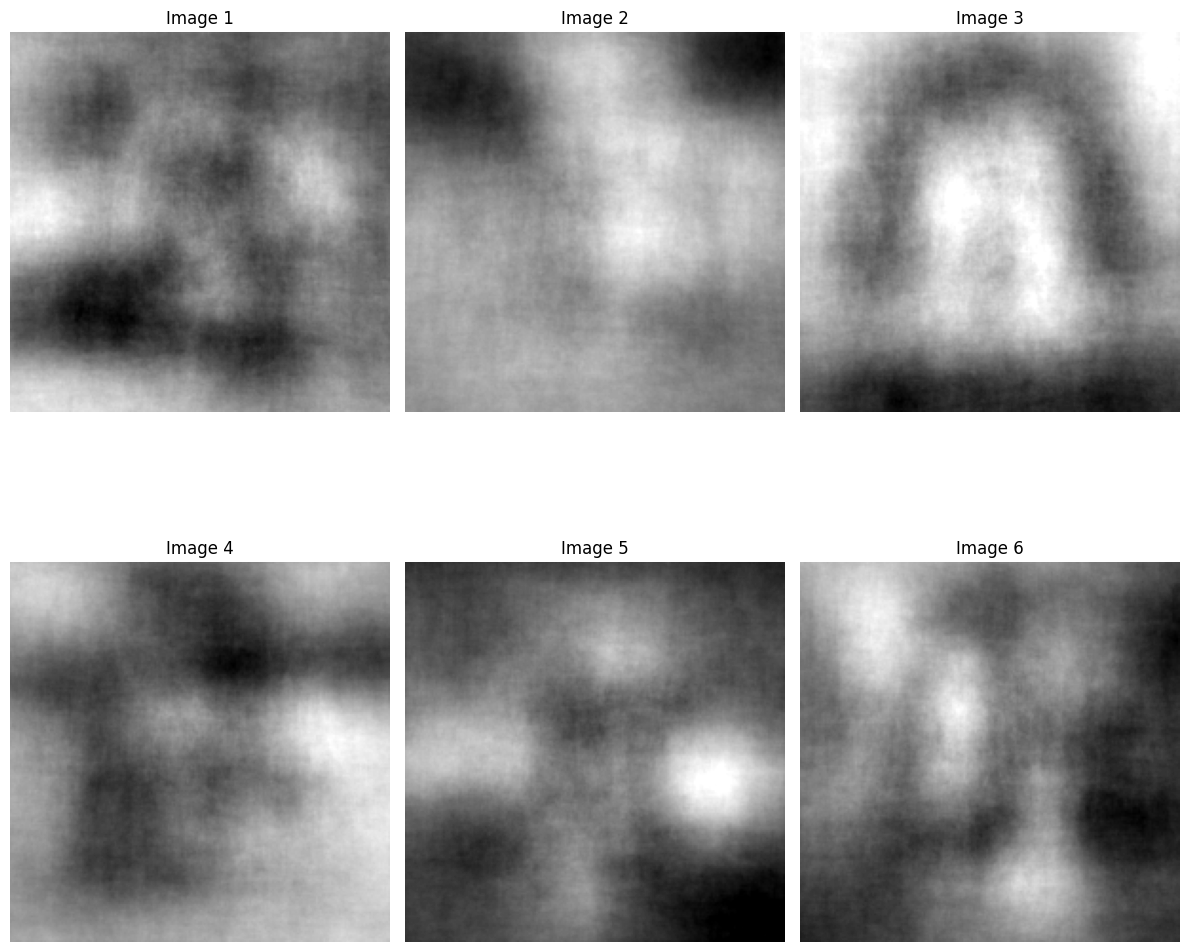

In [53]:
%reload_ext autoreload

helpers.preview_images(compressed_images_pca, 6)

In [61]:
compression.train_kmeans(n_clusters=4)
compressed_images_kmeans = compression.compress_images(compression_type="kmeans")

c:\ProgramData\miniconda\envs\gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


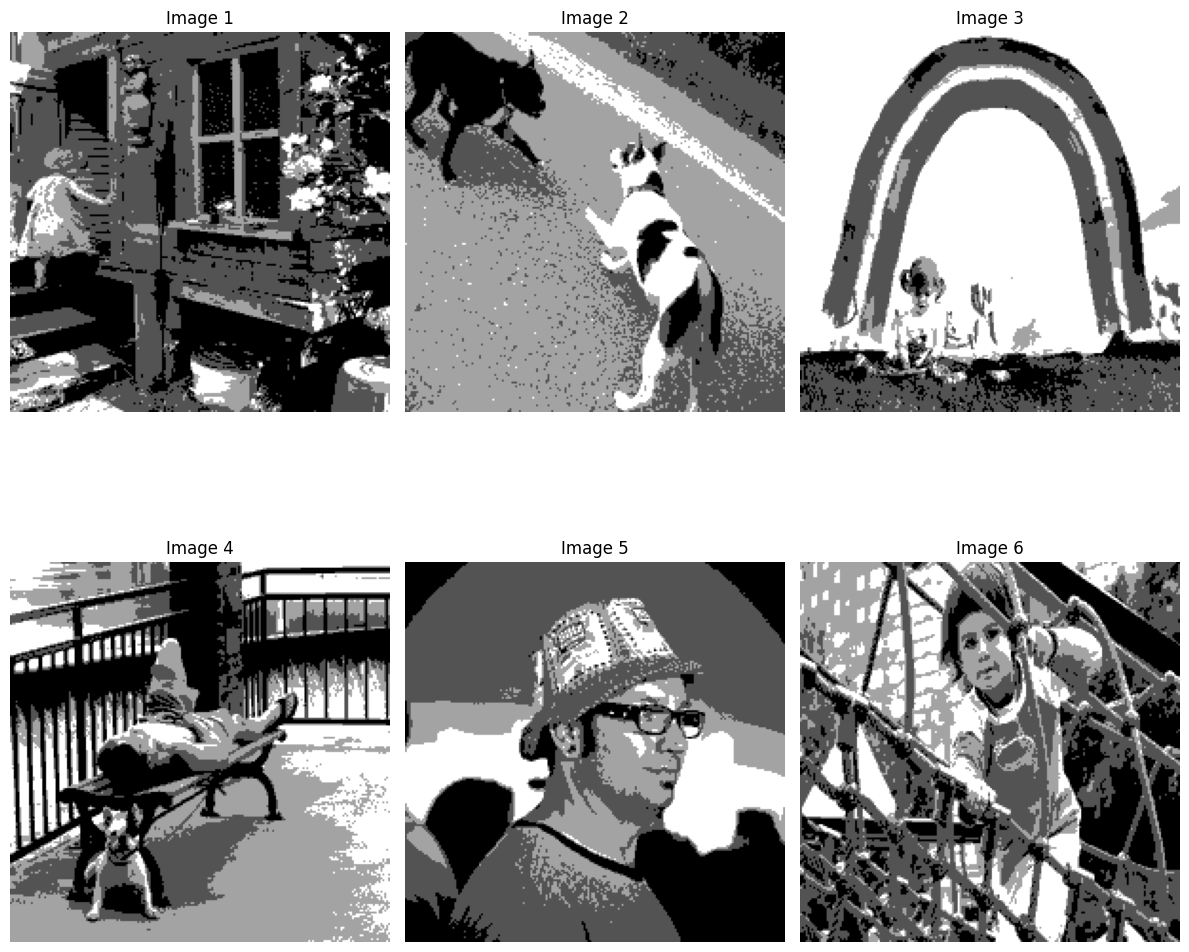

In [62]:
%reload_ext autoreload

helpers.preview_images(compressed_images_kmeans, 6)

In [63]:
pca_metrics = metrics.Metrics(original_images=test_images_gray, compressed_images=compressed_images_pca)
pca_all_metrics = pca_metrics.metrics_flow()
pca_all_metrics

{'Mean PSNR': 28.495, 'Mean SSIM': 0.306}

In [64]:
kmeans_metrics = metrics.Metrics(original_images=test_images_gray, compressed_images=compressed_images_kmeans)
kmeans_all_metrics = kmeans_metrics.metrics_flow()
kmeans_all_metrics

{'Mean PSNR': 28.51, 'Mean SSIM': 0.712}

In [65]:
pca_images_gray_path = "../Dataset/flicker8k/pca_images_gray/"
kmeans_images_gray_path = "../Dataset/flicker8k/kmeans_images_gray/"

In [66]:
for images, path in zip([compressed_images_pca, compressed_images_kmeans], [pca_images_gray_path, kmeans_images_gray_path]):
    helpers.save_images(images, path)

Images saved to ../Dataset/flicker8k/pca_images_gray/
Images saved to ../Dataset/flicker8k/kmeans_images_gray/


In [67]:
for name, path in zip(["pca", "kmeans"], [pca_images_gray_path, kmeans_images_gray_path]):
    compressed_size = helpers.get_path_size(path)
    print(f"Original Size: {original_size}, {name}: {compressed_size}")
    savings = (original_size - compressed_size) / original_size * 100
    print(f"Storage Savings: {savings:.2f}%")

Original Size: 8298933, pca: 3365725
Storage Savings: 59.44%
Original Size: 8298933, kmeans: 9786499
Storage Savings: -17.92%


# For DL Techniques

In [3]:
%reload_ext autoreload

train_images_paths = helpers.pick_random_images_from_path(train_path, 4000)
train_image_handler = image_handler.ImageHandling(image_paths=train_images_paths)
train_image_handler.open_images_to_list()
train_images = train_image_handler.images

In [4]:
train_images_rgb = helpers.convert_images_to_arrays(train_images)
train_images_gray = helpers.convert_to_grayscale(train_images)
train_images_gray = helpers.convert_images_to_arrays(train_images_gray)

In [5]:
compression_model = dl_compression.CNNCompression(input_shape=(200, 200, 1))
compression_model.train(train_images_gray, batch_size=4, epochs=20)

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/Autoencoder/Encoder/dense/MatMul/MatMul' defined at (most recent call last):
    File "c:\ProgramData\miniconda\envs\gpu\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\ProgramData\miniconda\envs\gpu\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\ProgramData\miniconda\envs\gpu\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "c:\ProgramData\miniconda\envs\gpu\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "c:\ProgramData\miniconda\envs\gpu\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Abdelrahman Rabah\AppData\Local\Temp\ipykernel_8412\370769906.py", line 2, in <module>
      compression_model.train(train_images_gray, batch_size=4, epochs=20)
    File "e:\Masters\Years\1st Year\1st Year 2nd Semester\CSE681 - Advanced Digital Image and Video Processing\Project\Phase 2\Notebooks\compression_techniques\dl_compression.py", line 132, in train
      self.model.fit(
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "c:\ProgramData\miniconda\envs\gpu\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/Autoencoder/Encoder/dense/MatMul/MatMul'
OOM when allocating tensor with shape[4,160000] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/Autoencoder/Encoder/dense/MatMul/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_3135]

In [13]:
compressed_images_dl = compression_model.compress_then_decompress(test_images_gray)

32/32 [==============================] - 1s 17ms/step


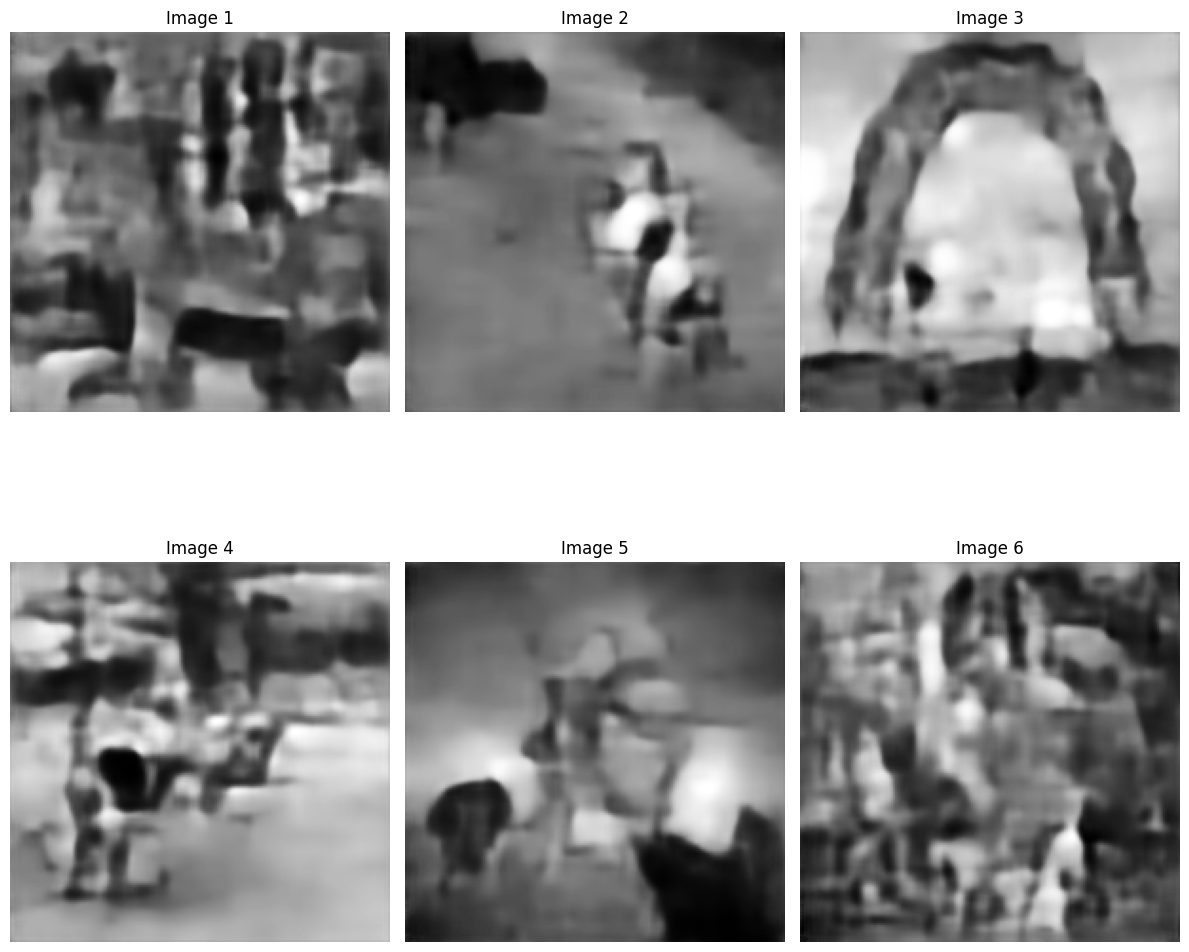

In [14]:
%reload_ext autoreload

helpers.preview_images(compressed_images_dl, 6)

In [17]:
dl_metrics = metrics.Metrics(original_images=test_images_gray, compressed_images=compressed_images_dl)
dl_all_metrics = dl_metrics.metrics_flow()
dl_all_metrics

{'Mean PSNR': 28.463, 'Mean SSIM': 0.421}

In [18]:
cnn_images_gray_path = "../Dataset/flicker8k/cnn_images_gray/"
for images, path in zip([compressed_images_dl], [cnn_images_gray_path]):
    helpers.save_images(images, path)

Images saved to ../Dataset/flicker8k/cnn_images_gray/
